## Part c): Adding Lasso for the Franke function

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from functions import FrankeFunction, create_design_matrix
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Using a standardized dataset 
np.random.seed(2024)

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
z = FrankeFunction(x, y)

#Creating lambda values avoiding "b" in the name as it is a reserved keyword in python
lamda = np.array([0.1,0.01,0.001,0.0001,0.00001])  # Try values in a small range

print(lamda)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [3]:


# Empty lists to store scores and parameters
beta_lasso_values = []
mse_lasso_scores = []
r2_lasso_scores = []

# Looping through each lambda
for i in range(np.size(lamda)):
    # Polynomial degrees
    degrees = np.arange(0, 5)

    # Appending lists to store scores and parameters
    beta_lasso_values.append([])
    mse_lasso_scores.append([])
    r2_lasso_scores.append([])


    # Looping through each degree
    for degree in degrees:

        # Creating design matrix
        #X = create_design_matrix(x, degree)
        poly_features = PolynomialFeatures(degree=degree)
        X = poly_features.fit_transform(np.column_stack((x, y)))

        # Split the data into training and test data
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

        # Scale and center the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        # Create and fit the linear regression model
        model = Lasso(alpha = lamda[i], fit_intercept=True, max_iter=10000)
        model.fit(X_train, z_train)
        
        # Make predictions for training and test data
        z_train_pred = model.predict(X_train_scaled)
        z_test_pred = model.predict(X_test_scaled)
        
        # Getting the coefficients (beta values)
        beta_lasso = model.coef_

        # Compute mean squared error for training and test data
        mse_train = mean_squared_error(z_train, z_train_pred)
        mse_test = mean_squared_error(z_test, z_test_pred)

        # Compute R2 score for training and test data
        r2_train = r2_score(z_train, z_train_pred)
        r2_test = r2_score(z_test, z_test_pred)
        
        # Appending beta values and scores
        beta_lasso_values[i].append(beta_lasso)
        mse_lasso_scores[i].append(mse_test)
        r2_lasso_scores[i].append(r2_test)

#print(beta_lasso_values)
#print(mse_lasso_scores)
#print(r2_lasso_scores)

/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.904e-02, tolerance: 2.829e-04
  model = cd_fast.enet_coordinate_descent(


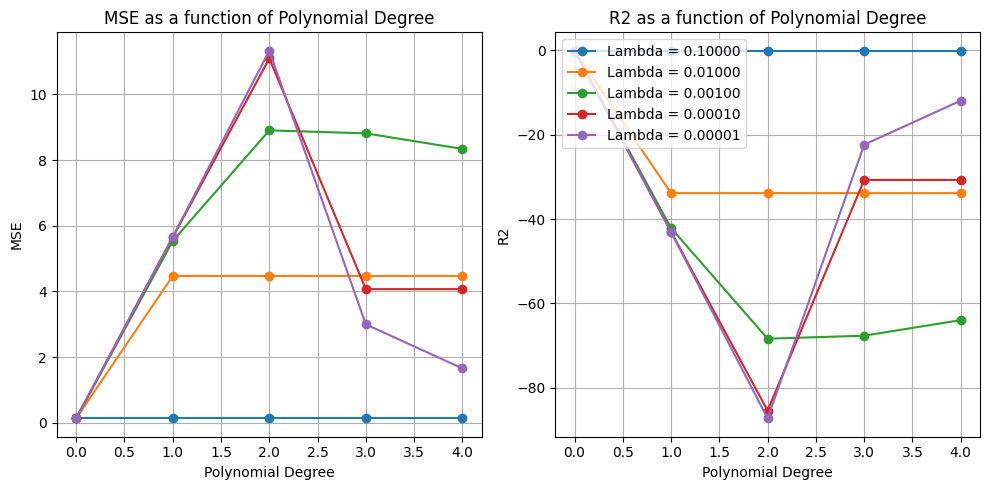

In [4]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree')
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree')
plt.grid()

for j in range(np.size(lamda)):
    plt.subplot(1, 2, 1)
    plt.plot(degrees, mse_lasso_scores[j], marker='o', label=f'Lambda = {lamda[j]:.5f}')
    plt.subplot(1, 2, 2)
    plt.plot(degrees, r2_lasso_scores[j], marker='o', label=f'Lambda = {lamda[j]:.5f}')

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

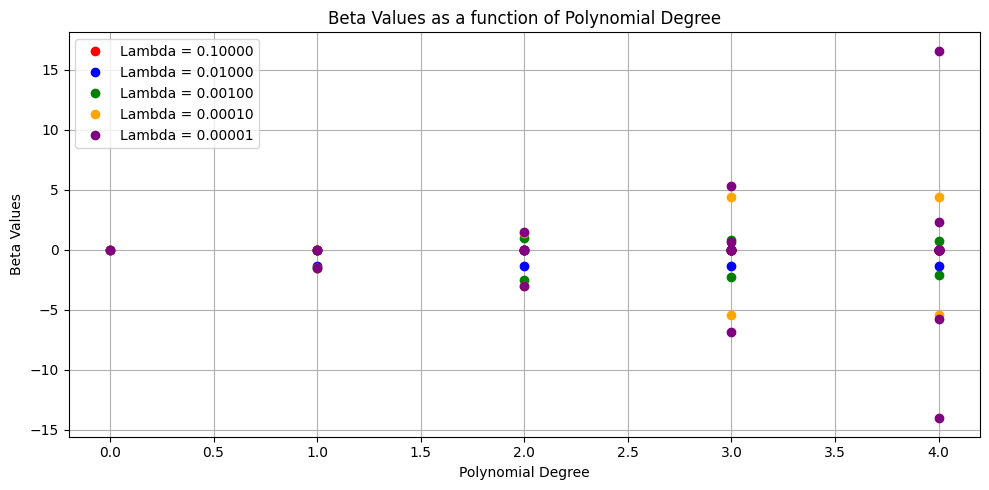

In [5]:
# Plotting beta values
plt.figure(figsize=(10, 5))
plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta Values as a function of Polynomial Degree')
plt.grid()

colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each lambda

for i in range(len(beta_lasso_values)):
    for j in range(len(beta_lasso_values[i])):
        for k in range(len(beta_lasso_values[i][j])):
            beta_i = beta_lasso_values[i][j][k]
            plt.plot(degrees[j]*np.ones_like(beta_lasso_values[i][j][k]), beta_lasso_values[i][j][k], marker='o', color=colors[i], label= f'Lambda = {lamda[i]:.5f}' if k == 0 else None)  # Use color based on lambda

plt.tight_layout()
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Lambda = {lamda[i]:.5f}', markerfacecolor=colors[i], markersize=8) for i in range(len(lamda))])
plt.show()


In this cell a "critical discussion of the three methods and a judgement of which model fits the data best" is required.